**The Task** 
<br>
Your objective is to understand and prepare the dataset for analysis, train a predictive model for classifiying (distinguishing) diseased patient (metabolic disorder) from a healthy individual and evaluate the model.

In [1]:
%matplotlib inline
#data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#data processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
#supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score

1. Loading the data set.

In [2]:
patient1_file_csv = 'patients_01.csv'
df = pd.read_csv(patient1_file_csv)

2.Exploratory analysis to better understand the data.
<br>
2.1 Example : Properties of features, outliers, missingness, correlation bwtween features 
<br>
2.2 How will you divide training and test data.

In [3]:
df.head()

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,dissease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,False
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False


In [4]:
df.columns

Index(['age', 'gender', 'bmi', 'high_chol', 'chol_check', 'history_stroke',
       'history_heart_disease', 'history_smoking', 'amount_activity',
       'alcohol_misuse', 'fruits', 'vegetables', 'health_gen', 'health_ment',
       'health_phys', 'walking_diff', 'high_bp', 'dissease'],
      dtype='object')

In [5]:
#changing the column name of dissease to disease
df = df.rename(columns={"dissease":"disease"})
df.head()

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,False
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False


In [6]:
#the type of each feature
df.dtypes

age                        int64
gender                    object
bmi                        int64
high_chol                 object
chol_check                object
history_stroke              bool
history_heart_disease     object
history_smoking           object
amount_activity           object
alcohol_misuse           float64
fruits                    object
vegetables                object
health_gen               float64
health_ment              float64
health_phys              float64
walking_diff                bool
high_bp                   object
disease                     bool
dtype: object

In [7]:
#the number of missing values from the data set
#history_smoking has the greatest number of NaN values, followed closely by alcohol_misuse
df.isnull().sum()

age                         0
gender                      0
bmi                         0
high_chol                 336
chol_check                286
history_stroke              0
history_heart_disease      52
history_smoking          1514
amount_activity           933
alcohol_misuse           1026
fruits                    105
vegetables                112
health_gen                 60
health_ment                83
health_phys               151
walking_diff                0
high_bp                     0
disease                     0
dtype: int64

In [8]:
df.describe() 
#to get the summary statistics of the data
#this is only showing the numerical data
#things of note: the age range for this data set is 16 to 104, there is samples with bmi 0 that should be filtered out.
#health_phys has a maximum value of 87- according to the feature data description this should not be greater than 30 for the number of days in a month.

,age,bmi,alcohol_misuse,health_gen,health_ment,health_phys
count,5124.000000,5124.000000,4098.000000,5064.000000,5041.000000,4973.000000
mean,55.038642,28.123341,2.394339,2.468009,3.399127,4.007641
std,16.497927,6.919013,2.908278,1.089227,7.732750,9.619864
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,24.000000,1.000000,2.000000,0.000000,0.000000
50%,56.000000,27.000000,2.000000,2.000000,0.000000,0.000000
75%,66.000000,31.000000,3.000000,3.000000,2.000000,2.000000
max,104.000000,87.000000,27.000000,5.000000,30.000000,87.000000


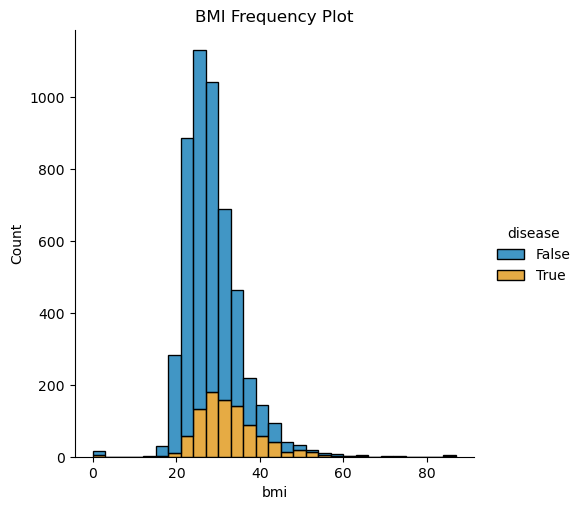

In [9]:
#plotting the distribution for bmi
sns.set_palette("colorblind")
sns.displot(df, x="bmi", binwidth=3, hue='disease', multiple="stack").set(title="BMI Frequency Plot")

<AxesSubplot:>

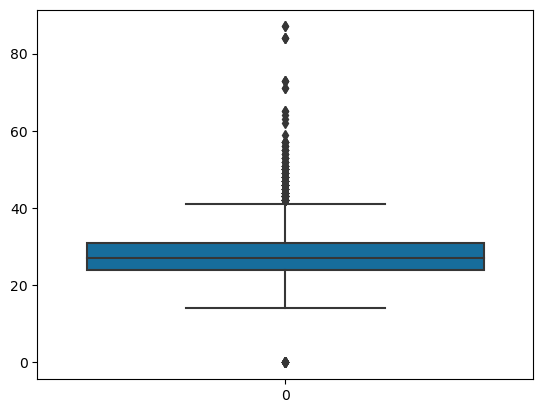

In [10]:
#creating a boxplot for better visualisation of bmi data
sns.boxplot(data=df['bmi'])

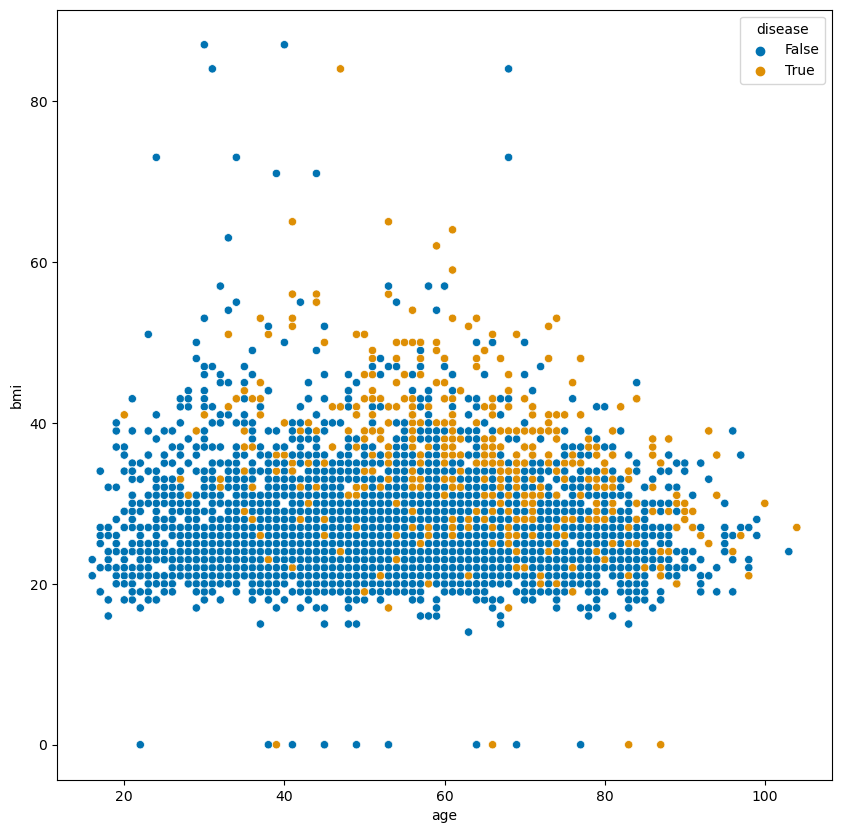

In [11]:
#scatter plot age and bmi
plt.figure(figsize = (10, 10)) 
ax = sns.scatterplot(data=df, x='age', y='bmi', hue='disease')
#across the age ranges there are several points where bmi is 0

In [12]:
#counting the number of samples with a bmi 0
bmi_zero_count = (df['bmi'] == 0).sum()
print("The number of samples with a BMI of 0 is:", bmi_zero_count)

The number of samples with a BMI of 0 is: 16


There are no NaN values in the data set for bmi, but there are 16 samples with a response of 0-these should be filtered from the data frame.

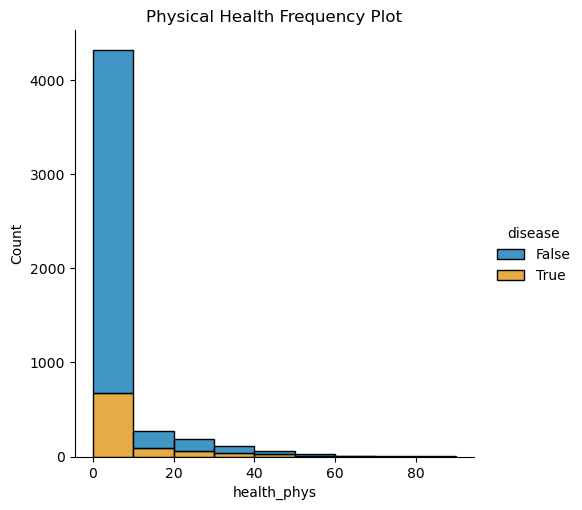

In [13]:
#health_phys
#visualising the data points greater than 30
sns.set_palette("colorblind")
sns.displot(df, x="health_phys", binwidth=10, hue='disease', multiple="stack").set(title="Physical Health Frequency Plot")

In [14]:
#filtering the rows where the physical health response is greater than 30
greater_than_30_phys_health = df[df['health_phys'] > 30]
len(greater_than_30_phys_health)
#There are 194 samples with a response for physical health that is greater than 30, which is outside of the described range for the questionairre, so should be filtered out.

194

**Finding the number of patients that are healthy vs have the metabolic disease:**

In [15]:
#counting the number of patients with the disease
count_disease_true = (df['disease'] == True).sum()
print("The number of patients with the disease is:", count_disease_true)

The number of patients with the disease is: 936


In [16]:
#count for the number of patients that do not have the disease
count_disease_false = (df['disease'] == False).sum()
print("The number of patients that do not have the disease is:", count_disease_false)

The number of patients that do not have the disease is: 4188


There is a clear imbalance in the data set with 936 samples for disease and 4188 being 'normal'. 

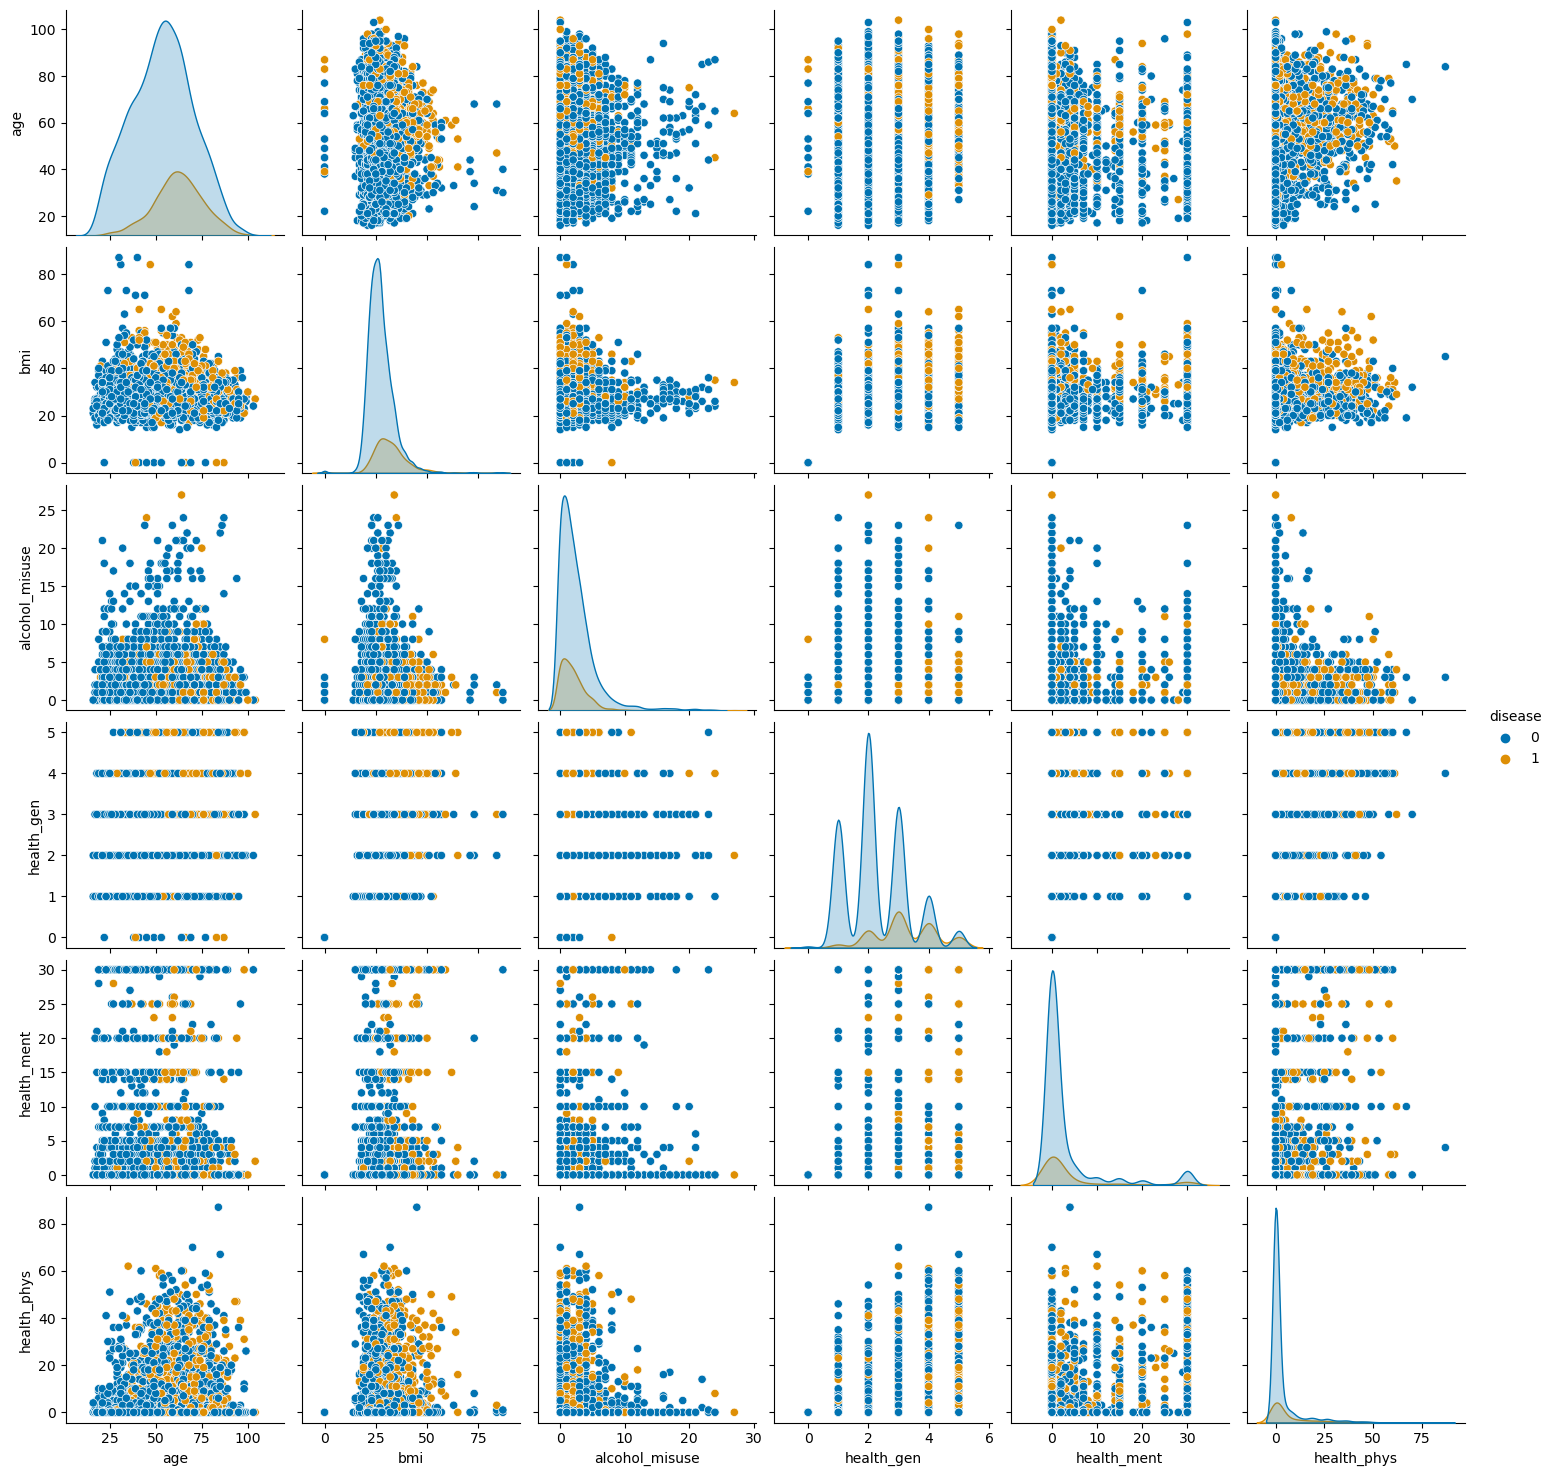

In [17]:
#looking at the relationship between all the numerical features
df=df.copy()
df.loc[:,'disease']=df['disease'].astype(int)#converting the disease feature to an integer type so it can be used in the plot
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical_df, hue='disease', diag_kind="kde")

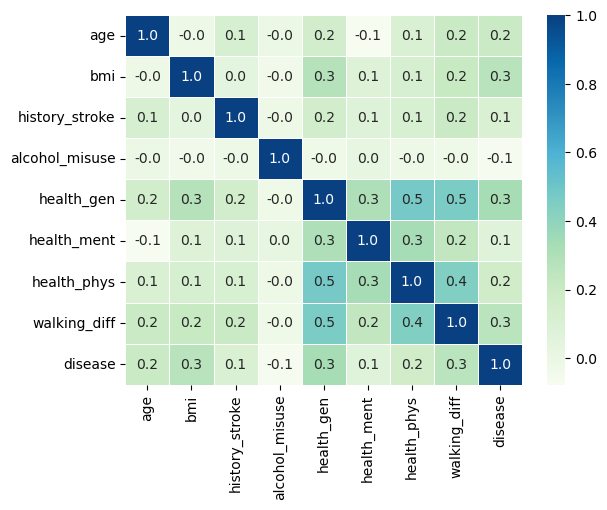

In [18]:
#correlation plot
ax=sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='GnBu')

Heatmaps are used as a visualisation tool to see the patterns and relationships in the numerical data set and the disease feature.
<br>
The plot above shows the correlation between pairs of the features on the axes above.
<br>
The scale on the right shows the strength of the correlation, 1 being completely similar and 0 being not similar at all. 
<br>
The heatmap shows that there is some correlation(0.5) between physical health and general health, walking difficulty and general health. And correlation of 0.4 between walking difficulty and physical health.


**Further preprocessing visualisation steps:**

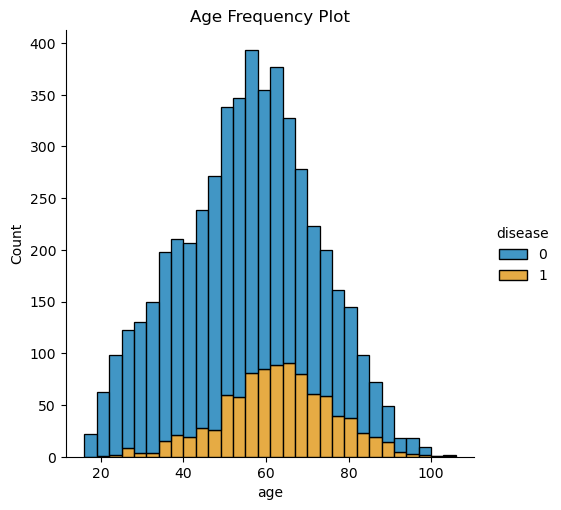

In [19]:
#age frequency plot
sns.set_palette("colorblind")
sns.displot(df, x="age", binwidth=3, hue='disease', multiple="stack").set(title="Age Frequency Plot")

The plot above shows that the age feature appears to have a fairly normal distribution with the mean being just under the age of 60 years old.
<br>
The 'disease' feature is used to differentiate the age count.

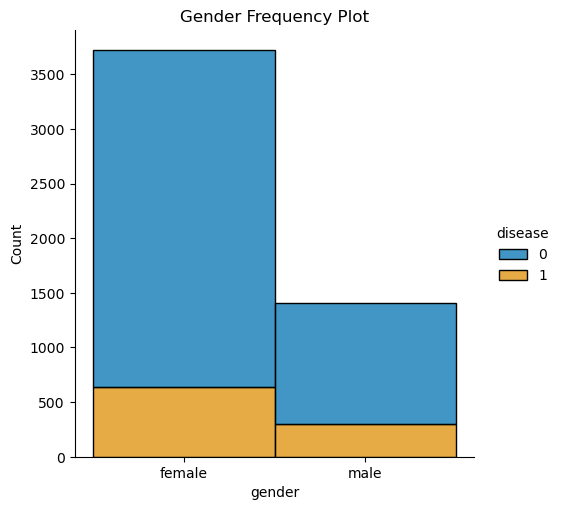

In [20]:
#gender
sns.set_palette("colorblind")
sns.displot(df, x="gender", binwidth=3, hue='disease', multiple="stack").set(title="Gender Frequency Plot")

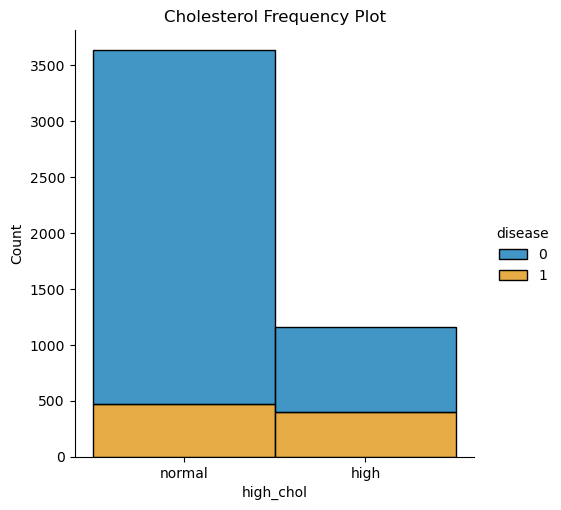

In [21]:
#high cholesterol
sns.set_palette("colorblind")
sns.displot(df, x="high_chol", binwidth=3, hue='disease', multiple="stack").set(title="Cholesterol Frequency Plot")

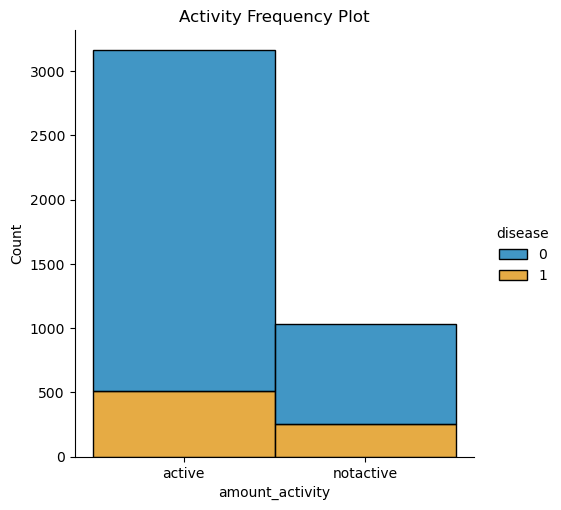

In [22]:
#amount_activity
sns.set_palette("colorblind")
sns.displot(df, x="amount_activity", binwidth=1, hue='disease', multiple="stack").set(title="Activity Frequency Plot")

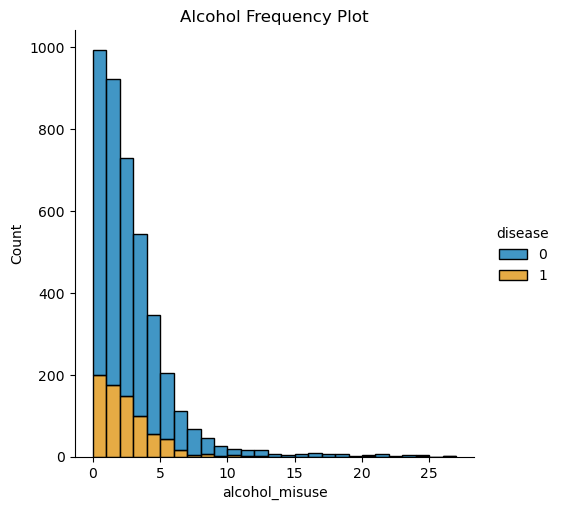

In [23]:
#alcohol_misuse
sns.set_palette("colorblind")
sns.displot(df, x="alcohol_misuse", binwidth= 1, hue='disease', multiple="stack").set(title="Alcohol Frequency Plot")

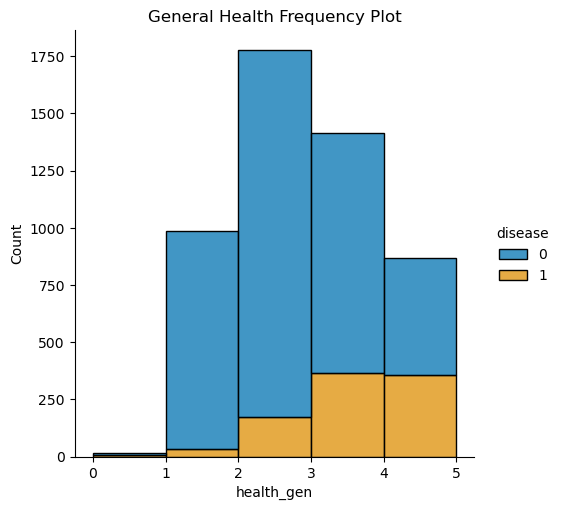

In [24]:
#general health
sns.set_palette("colorblind")
sns.displot(df, x="health_gen", binwidth=1, hue='disease', multiple="stack").set(title="General Health Frequency Plot")

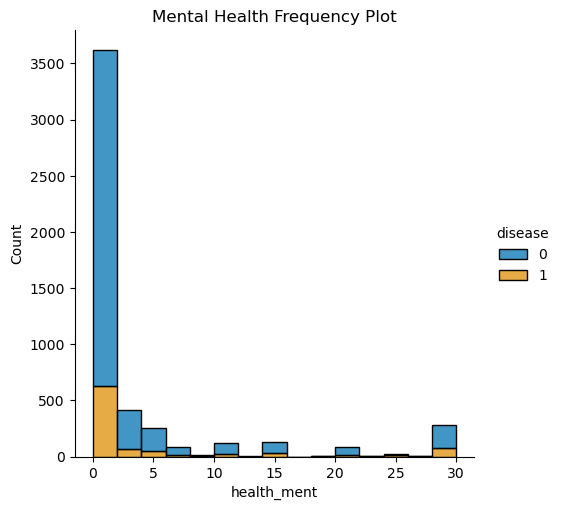

In [25]:
#mental health
sns.set_palette("colorblind")
sns.displot(df, x="health_ment", binwidth=2, hue='disease', multiple="stack").set(title="Mental Health Frequency Plot")

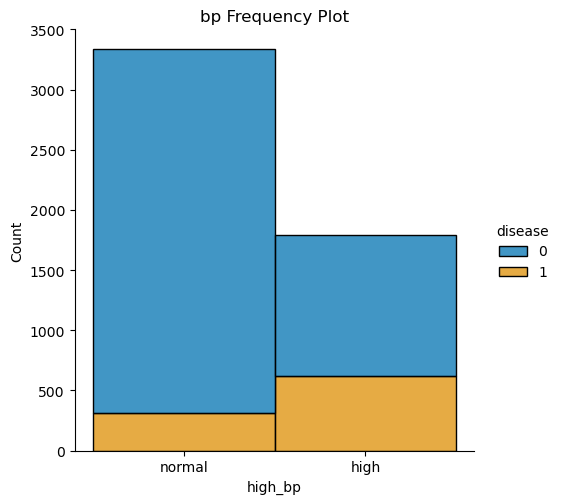

In [26]:
#blood pressure
sns.set_palette("colorblind")
sns.displot(df, x="high_bp", binwidth=10, hue='disease', multiple="stack").set(title="bp Frequency Plot")

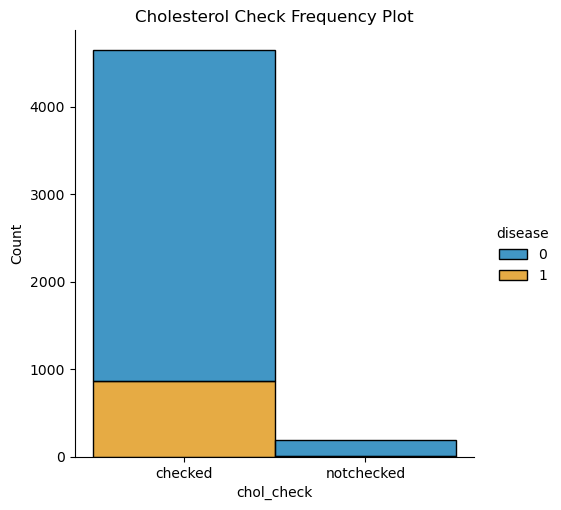

In [27]:
#chol_check
sns.set_palette("colorblind")
sns.displot(df, x="chol_check", binwidth=10, hue='disease', multiple="stack").set(title="Cholesterol Check Frequency Plot")

The frequency plot above shows that there is no data for where cholesterol is not checked and the patient has the metabolic disease.

<AxesSubplot:xlabel='history_stroke', ylabel='count'>

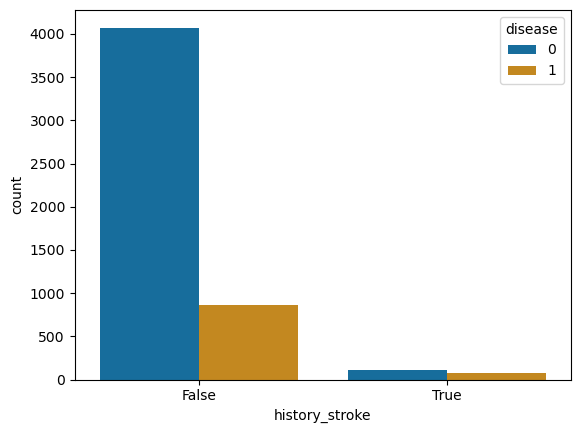

In [28]:
#stroke_history
sns.countplot(x='history_stroke', data=df,hue='disease')

Text(0.5, 1.0, 'Heatmap of Missing values')

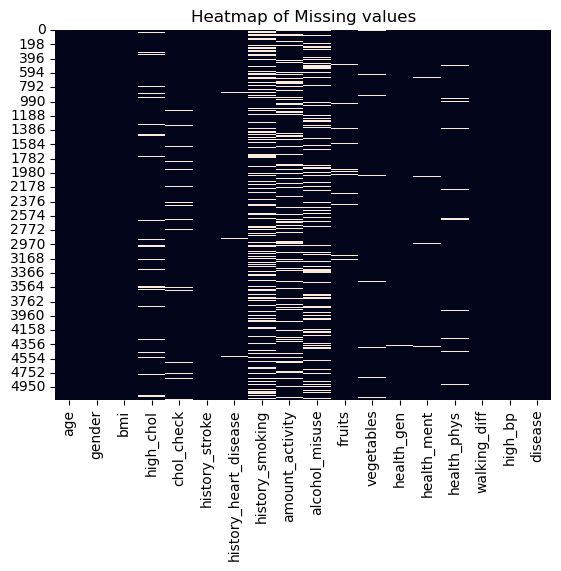

In [29]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Missing values')
#visualising the missing data in the data frame
#the white lines indicate missing values in the data set
#can see that history smoking, alcohol consumption, amount of activity 
#and high cholesterol form the majority of the missing data

**Plan on dividing the data set:**
<br>
The data set will be divided in to a training set and a test set, and making sure that the features are evenly distributes between the 2 sets. For example, the data set is heavily skewed with more female patient samples, so need to ensure that these are evenly distributed in the split sets.
<br>
The train_test_split function will be used to do this.

**3. How will you deal with missing data. Clearly explain your approach.**

<ins>Filtering by the number of missing values per patient sample:</ins>

In [30]:
missing_values_per_sample = df.isnull().sum(axis=1)

In [31]:
samples_per_missing_count = missing_values_per_sample.value_counts().sort_index()

Text(0.5, 1.0, 'Number of Missing Features per Sample')

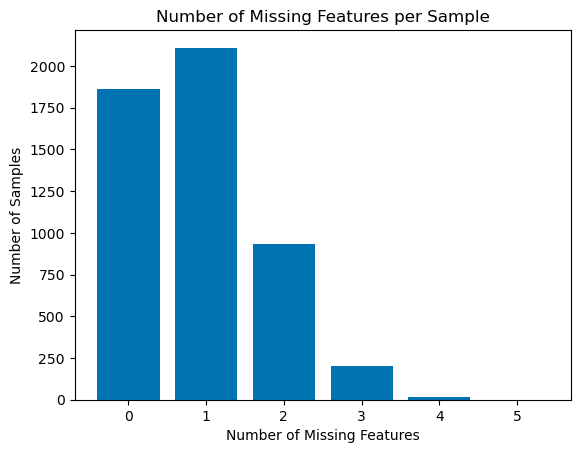

In [32]:
plt.bar(samples_per_missing_count.index, samples_per_missing_count.values)
plt.xlabel('Number of Missing Features')
plt.ylabel('Number of Samples')
plt.title('Number of Missing Features per Sample')

Imputing data for samples that have 3 or more missing features is likely to add bias to the data set, so filtering out these samples from the data set.

In [33]:
threshold = 3
# Filter out samples with 3 or more missing values
filtered_df = df[df.isnull().sum(axis=1) < threshold]

Checking the number of missing features per sample in the filtered data frame:

In [34]:
missing_values_per_sample2 = filtered_df.isnull().sum(axis=1)

In [35]:
samples_per_missing_count2 = missing_values_per_sample2.value_counts().sort_index()

Text(0.5, 1.0, 'Number of Missing Features per Sample')

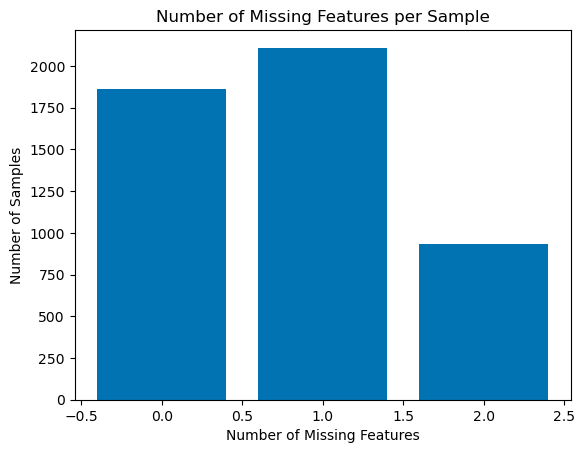

In [36]:
plt.bar(samples_per_missing_count2.index, samples_per_missing_count2.values)
plt.xlabel('Number of Missing Features')
plt.ylabel('Number of Samples')
plt.title('Number of Missing Features per Sample')

In [37]:
print("Number of samples that have been filtered out:",len(df)-len(filtered_df))

Number of samples that have been filtered out: 222


<ins>Filtering of the 0 values for BMI:</ins>

In [38]:
#checking for the number of 0 values for samples in the bmi feature
count_zero_bmi = (filtered_df['bmi'] == 0).sum()
print("The number of samples with a BMI of 0 is:", count_zero_bmi)

The number of samples with a BMI of 0 is: 16


In [39]:
filtered_df2 = filtered_df[filtered_df['bmi'] != 0]
print("Checking the number of samples filtered out:",len(filtered_df)-len(filtered_df2))

Checking the number of samples filtered out: 16


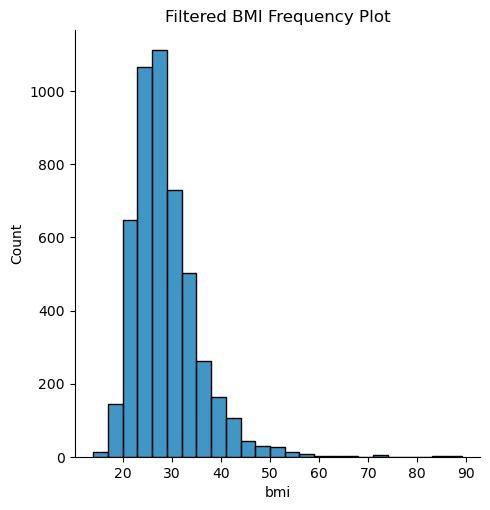

In [40]:
#plotting the distribution of the filtered data for bmi
sns.set_palette("colorblind")
sns.displot(filtered_df2, x="bmi", binwidth=3, multiple="stack").set(title="Filtered BMI Frequency Plot")

The plot above shows that there are no sample values of 0 BMI in the new filtered data frame.

Filtering out the samples with a response for physical health that is greater than 30, which is outside of the described range for the questionairre, so should be filtered out:

In [41]:
phys_health_threshold = filtered_df2[filtered_df2['health_phys'] > 30]
len(phys_health_threshold)
#There are 194 samples with a response for physical health that is greater than 30, which is outside of the described range for the questionairre, so should be filtered out.

189

In [42]:
filtered_df3 = filtered_df2[~filtered_df2.index.isin(phys_health_threshold.index)]

In [43]:
filtered_df3

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,0
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,0
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,0
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,0
5,36,female,24,normal,checked,False,False,False,NaN,4.0,NaN,True,1.0,5.0,0.0,False,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,30,female,39,normal,checked,False,False,NaN,notactive,3.0,False,True,2.0,7.0,0.0,False,normal,0
5120,44,female,25,normal,NaN,False,False,False,active,2.0,True,True,2.0,0.0,0.0,False,normal,0
5121,51,female,32,normal,checked,False,False,False,active,NaN,True,False,2.0,0.0,0.0,False,normal,0
5122,26,female,28,normal,checked,False,True,True,active,NaN,False,True,3.0,0.0,0.0,False,normal,0


In [44]:
#checking that the correct number of sample have been filtered out
len(filtered_df2)-len(filtered_df3)

189

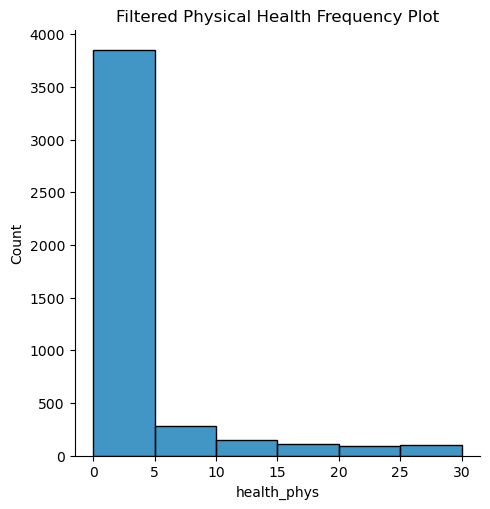

In [45]:
#health_phys
#visualising the data points greater than 30
sns.displot(filtered_df3, x="health_phys", binwidth=5).set(title="Filtered Physical Health Frequency Plot")

Text(0.5, 1.0, 'Heatmap of Missing values after filtering steps')

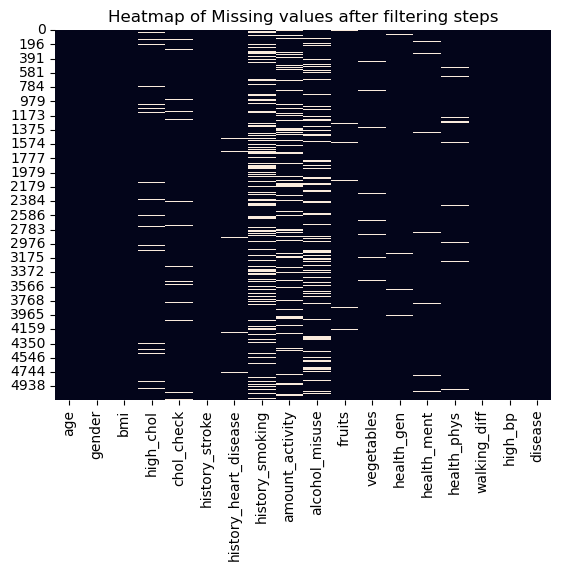

In [46]:
sns.heatmap(filtered_df3.isnull(), cbar=False)
plt.title('Heatmap of Missing values after filtering steps')

Removing some of the categorical data that has binary responses as it is difficult to impute all without creating bias.

In [47]:
df4= filtered_df3.dropna(subset=["vegetables"])
df5= df4.dropna(subset=["fruits"])
df6= df5.dropna(subset=["amount_activity"])
df7= df6.dropna(subset=["high_chol"])
df8= df7.dropna(subset=["history_heart_disease"])
df9= df8.dropna(subset=["chol_check"])

In [48]:
df9.isnull().sum()

age                        0
gender                     0
bmi                        0
high_chol                  0
chol_check                 0
history_stroke             0
history_heart_disease      0
history_smoking          970
amount_activity            0
alcohol_misuse           660
fruits                     0
vegetables                 0
health_gen                38
health_ment               49
health_phys               92
walking_diff               0
high_bp                    0
disease                    0
dtype: int64

In [49]:
len(filtered_df3)-len(df9)

1351

Text(0.5, 1.0, 'Heatmap of Missing values after further filtering')

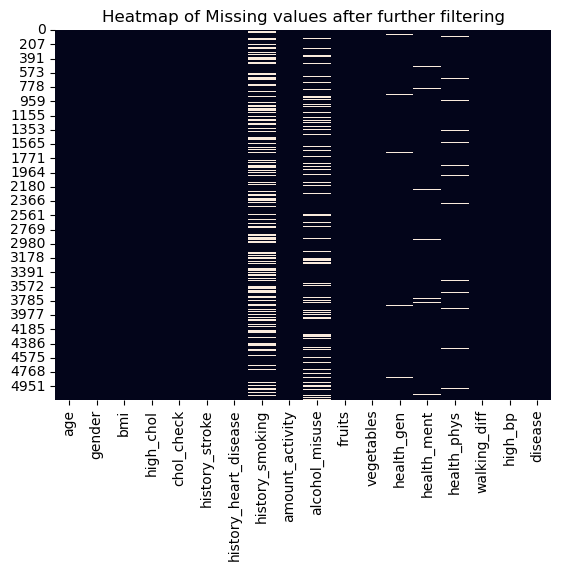

In [50]:
sns.heatmap(df9.isnull(), cbar=False)
plt.title('Heatmap of Missing values after further filtering')

**Next step: seperating data into training and test set prior to the imputation steps.**
- When dividing the data into a training and test set I with use stratification, this step will be prior to any imputation methods.


In [51]:
df9.columns

Index(['age', 'gender', 'bmi', 'high_chol', 'chol_check', 'history_stroke',
       'history_heart_disease', 'history_smoking', 'amount_activity',
       'alcohol_misuse', 'fruits', 'vegetables', 'health_gen', 'health_ment',
       'health_phys', 'walking_diff', 'high_bp', 'disease'],
      dtype='object')

Splitting the patients data frame into train and test without removing the target variable for visualising methods

In [52]:
X=df9[['age', 'gender', 'bmi', 'high_chol', 'chol_check', 'history_stroke', 'history_heart_disease', 'history_smoking', 'amount_activity', 'alcohol_misuse', 'fruits', 'vegetables', 'health_gen', 'health_ment', 'health_phys', 'walking_diff', 'high_bp','disease']]

In [53]:
#splitting in to training and testing sets, with 7:3 ratio between training and test set respectively
X_train, X_test= train_test_split(X, test_size=0.3, random_state=42, stratify=df9['disease'])

**Imputing the NaN values for X_train and X_test:**

alcohol misuse imputing

In [54]:
###X_train###
#filling in the missing values in the alcohol consumption column with the average
avg_alcohol_train = round(X_train["alcohol_misuse"].mean())
X_train["alcohol_misuse"].fillna(avg_alcohol_train, inplace=True)

###X_test###
#filling in the missing values in the alcohol consumption column with the average
avg_alcohol_test = round(X_test["alcohol_misuse"].mean())
X_test["alcohol_misuse"].fillna(avg_alcohol_test, inplace=True)

general health imputing

In [55]:
###X_train###
#filling in the missing values in the general health column with the average
avg_gen_health_train = round(X_train["health_gen"].mean())
X_train["health_gen"].fillna(avg_gen_health_train, inplace=True)

###X_test###
#filling in the missing values in the general health column with the average
avg_gen_health_test = round(X_test["health_gen"].mean())
X_test["health_gen"].fillna(avg_gen_health_test, inplace=True)

mental health imputing

In [56]:
###X_train###
#filling in the missing values in the mental health column with the average
avg_ment_health_train = round(X_train["health_ment"].mean())
X_train["health_ment"].fillna(avg_ment_health_train, inplace=True)

###X_test###
#filling in the missing values in the mental health column with the average
avg_ment_health_test = round(X_test["health_ment"].mean())
X_test["health_ment"].fillna(avg_ment_health_test, inplace=True)

physical health imputing

In [57]:
###X_train###
#imputing with the average value of the physical health column
avg_phys_health_train = round(X_train["health_phys"].mean())
X_train["health_phys"].fillna(avg_phys_health_train, inplace=True)

###X_test###
#imputing with the average value of the physical health column
avg_phys_health_test = round(X_test["health_phys"].mean())
X_test["health_phys"].fillna(avg_phys_health_test, inplace=True)

Text(0.5, 1.0, 'X_train Remaining NaN values')

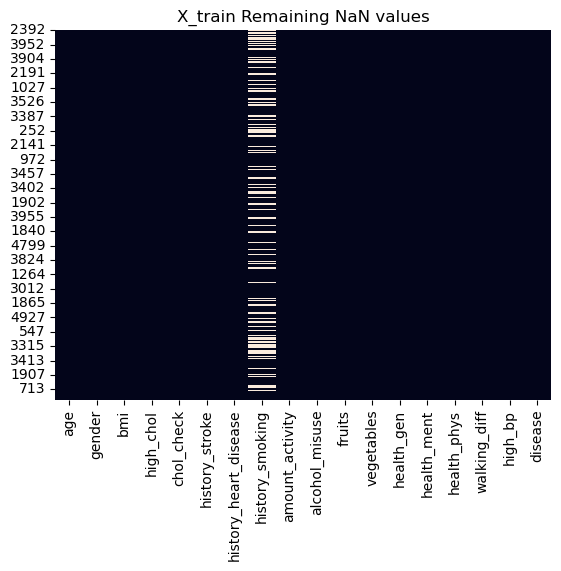

In [58]:
sns.heatmap(X_train.isnull(), cbar=False)
plt.title('X_train Remaining NaN values')

Text(0.5, 1.0, 'X_test remaining NaN values')

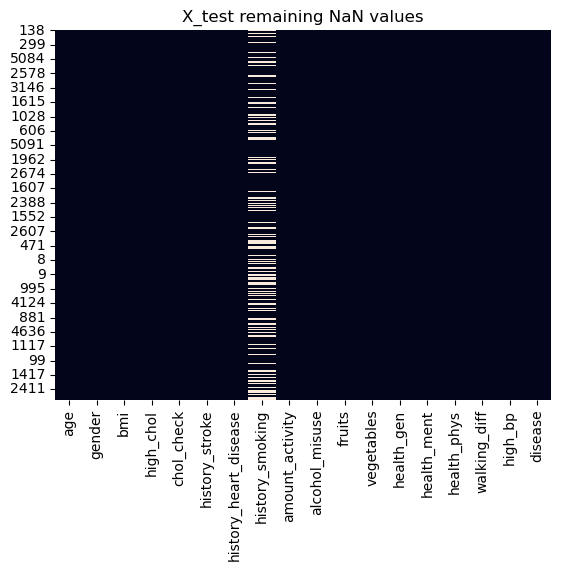

In [59]:
sns.heatmap(X_test.isnull(), cbar=False)
plt.title('X_test remaining NaN values')

In [60]:
X_train['history_smoking'] = X_train['history_smoking'].fillna('missing')
X_test['history_smoking'] = X_test['history_smoking'].fillna('missing')

**4. Unsupervised analysis. Investigate trends and patterns in data through some unsupervised learning approaches. 4.1 Please also look for inherent sub group of patients**

In [61]:
#Using LabelEncoder to convert all the categorical data into numerical values
X_train_encoded = dict()

for col_name in X_train.columns:
    series = X_train[col_name]
    series = series.astype(str)#converting to string type
    label_encoder = LabelEncoder()
    X_train[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    X_train_encoded[col_name] = label_encoder

PCA

In [62]:
data_array = X_train.values
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_array)

n_components = min(X_train.shape[0], X_train.shape[1])  # Number of components should be <= min(rows, columns)
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)
# Create a DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_result, columns=columns)

In [63]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.17027581 0.08047559 0.07299745 0.06169948 0.05822865 0.05673858
 0.05559987 0.05251166 0.05090056 0.04747978 0.04381682 0.04188825
 0.03988332 0.03858183 0.03710357 0.0341923  0.02963645 0.02799001]


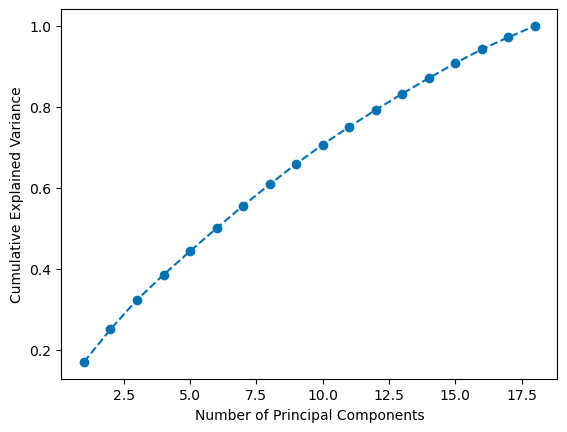

In [64]:
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [65]:
pca_df
pca_df['disease'] = X_train['disease']

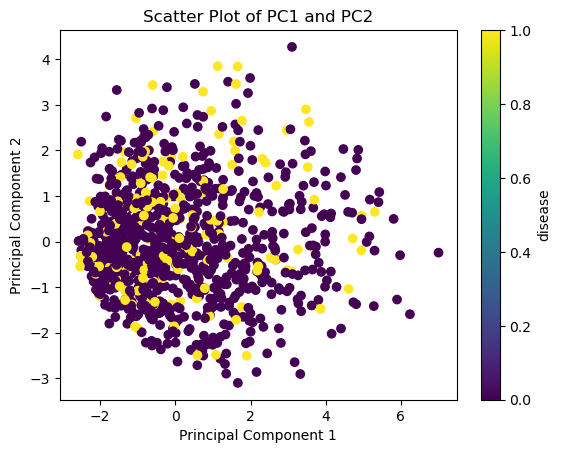

In [66]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['disease'])
plt.title('Scatter Plot of PC1 and PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='disease')
plt.show()

t-SNE

 t-SNE is a nonlinear technique and it focuses on preserving the relationship between data points in a lower-dimensional space, by using a Gaussian kernel. The algorithm preserves the pairwise similarities by minimising the divergence with gradient descent.
 

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


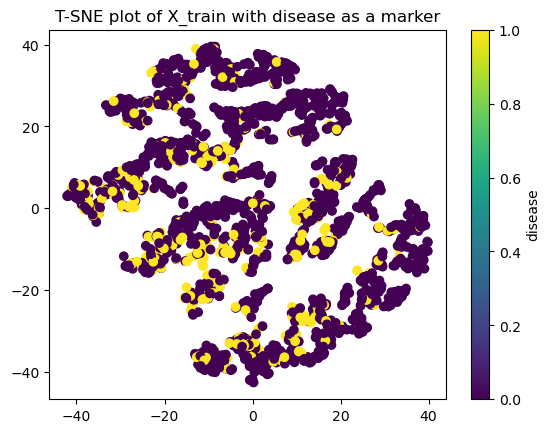

In [67]:
model = TSNE(learning_rate=10.0)
# Fitting Model
transformed = model.fit_transform(X_train)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=X_train['disease'])
plt.title('T-SNE plot of X_train with disease as a marker')
plt.colorbar(label='disease')
plt.show()

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


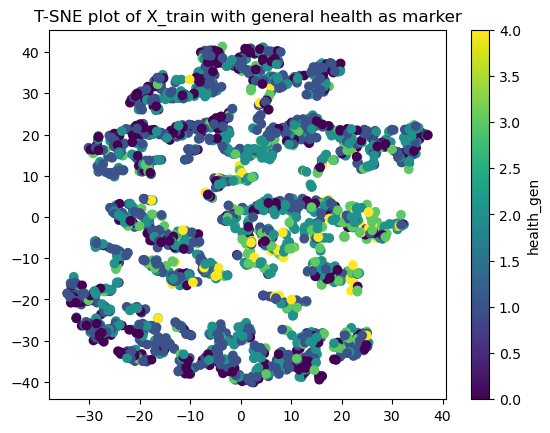

In [68]:
model = TSNE(learning_rate=10.0)
# Fitting Model
transformed = model.fit_transform(X_train)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=X_train['health_gen'])
plt.title('T-SNE plot of X_train with general health as marker')
plt.colorbar(label='health_gen')
plt.show()

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


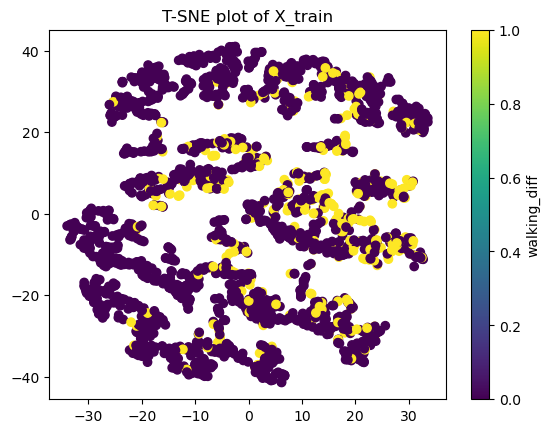

In [69]:
model = TSNE(learning_rate=10.0)
# Fitting Model
transformed = model.fit_transform(X_train)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=X_train['walking_diff'])
plt.title('T-SNE plot of X_train')
plt.colorbar(label='walking_diff')
plt.show()

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


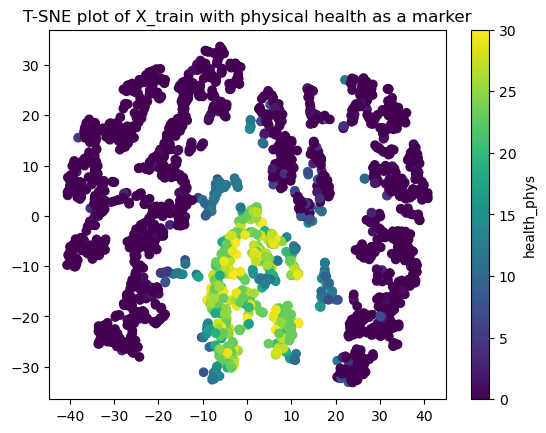

In [70]:
model = TSNE(learning_rate=10.0)
# Fitting Model
transformed = model.fit_transform(X_train)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=X_train['health_phys'])
plt.title('T-SNE plot of X_train with physical health as a marker')
plt.colorbar(label='health_phys')
plt.show()

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


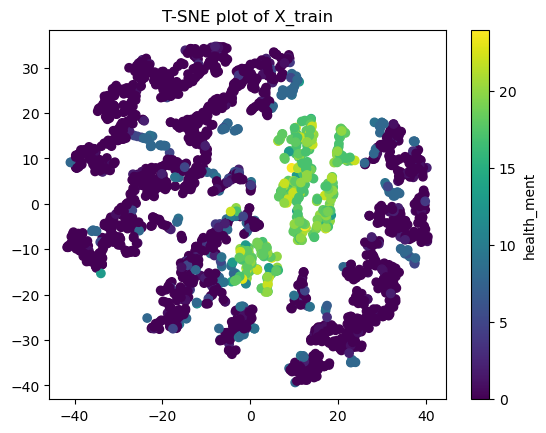

In [71]:
model = TSNE(learning_rate=10.0)
# Fitting Model
transformed = model.fit_transform(X_train)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=X_train['health_ment'])
plt.title('T-SNE plot of X_train')
plt.colorbar(label='health_ment')
plt.show()

/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


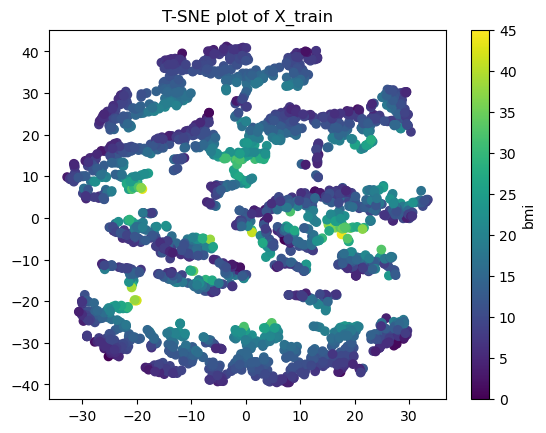

In [72]:
model = TSNE(learning_rate=10.0)
# Fitting Model
transformed = model.fit_transform(X_train)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=X_train['bmi'])
plt.title('T-SNE plot of X_train')
plt.colorbar(label='bmi')
plt.show()

**5.Train a supervised predictive model (also known as classifier ). 
<br>
5.1 Train classifiers. You can train multiple classifiers and see which one works best. 
<br>
5.2 Evaluate your model training performance. 
<br>
5.3 Use and compare different performance evaluation metrics 
<br>
5.4 Use cross validation to evaluate variation in training perforamnce 
<br>
5.5 Is your model overfitting**?

In [73]:
#defining the independent and dependent variables
X = df9[['age', 'gender', 'bmi', 'high_chol', 'chol_check', 'history_stroke', 'history_heart_disease', 'history_smoking', 'amount_activity', 'alcohol_misuse',
         'fruits', 'vegetables', 'health_gen', 'health_ment', 'health_phys', 'walking_diff', 'high_bp']]
y= df9['disease']
#splitting in to training and testing sets, with 7:3 ratio between training and test set respectively
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [74]:
X_train2.shape

(2342, 17)

In [75]:
X_test2.shape

(1004, 17)

**Imputing the NaN values for X_train and X_test:**

alcohol misuse imputing

In [76]:
###X_train###
#filling in the missing values in the alcohol consumption column with the average
avg_alcohol_train = round(X_train2["alcohol_misuse"].mean())
X_train2["alcohol_misuse"].fillna(avg_alcohol_train, inplace=True)

###X_test###
#filling in the missing values in the alcohol consumption column with the average
avg_alcohol_test = round(X_test2["alcohol_misuse"].mean())
X_test2["alcohol_misuse"].fillna(avg_alcohol_test, inplace=True)

general health imputing

In [77]:
###X_train###
#filling in the missing values in the general health column with the average
avg_gen_health_train = round(X_train2["health_gen"].mean())
X_train2["health_gen"].fillna(avg_gen_health_train, inplace=True)

###X_test###
#filling in the missing values in the general health column with the average
avg_gen_health_test = round(X_test2["health_gen"].mean())
X_test2["health_gen"].fillna(avg_gen_health_test, inplace=True)

mental health imputing

In [78]:
###X_train###
#filling in the missing values in the mental health column with the average
avg_ment_health_train = round(X_train2["health_ment"].mean())
X_train2["health_ment"].fillna(avg_ment_health_train, inplace=True)

###X_test###
#filling in the missing values in the mental health column with the average
avg_ment_health_test = round(X_test2["health_ment"].mean())
X_test2["health_ment"].fillna(avg_ment_health_test, inplace=True)

physical health imputing

In [79]:
###X_train###
#imputing with the average value of the physical health column
avg_phys_health_train = round(X_train2["health_phys"].mean())
X_train2["health_phys"].fillna(avg_phys_health_train, inplace=True)

###X_test###
#imputing with the average value of the physical health column
avg_phys_health_test = round(X_test2["health_phys"].mean())
X_test2["health_phys"].fillna(avg_phys_health_test, inplace=True)

In [80]:
X_train2['history_smoking'] = X_train2['history_smoking'].fillna('missing')
X_test2['history_smoking'] = X_test2['history_smoking'].fillna('missing')

In [81]:
#Using LabelEncoder to convert all the categorical data into numerical values
X_train2_encoded = dict()

for col_name in X_train2.columns:
    series = X_train2[col_name]
    series = series.astype(str)#converting to string type
    label_encoder = LabelEncoder()
    X_train2[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    X_train2_encoded[col_name] = label_encoder

In [82]:
#Using LabelEncoder to convert all the categorical data into numerical values in X_test
X_test2_encoded = dict()

for col_name in X_test2.columns:
    series = X_test2[col_name]
    series = series.astype(str)#converting to string type
    label_encoder = LabelEncoder()
    X_test2[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    X_test2_encoded[col_name] = label_encoder

**Supervised model**
<br>
Using logistic regression

In [87]:
lr = LogisticRegression()
# fit logistic regression model
lr.fit(X_train2, y_train2)
y_pred = lr.predict(X_test2)
y_pred
# evaluate accuracy score of the model
accuracy = accuracy_score(y_test2, y_pred)
print('Accuracy: ',accuracy)
f1 = f1_score(y_test2, y_pred)
print('F1: ',f1)
precision = precision_score(y_test2, y_pred)
print('Precision: ',precision)
recall = recall_score(y_test2, y_pred)
print('Recall: ',recall)

Accuracy:  0.853585657370518
F1:  0.39506172839506176
Precision:  0.6575342465753424
Recall:  0.2823529411764706


/Users/amethyst/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train2, y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

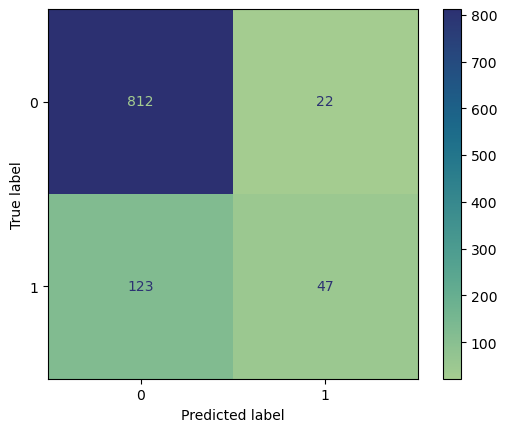

In [85]:
y_pred = clf.predict(X_test2)
cm = confusion_matrix(y_test2, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='crest')
#results show that from the 1004 samples, using the logistic regression model 
#there 812 true negatives, 123 false negatives, 22 false positives and 47 true positives

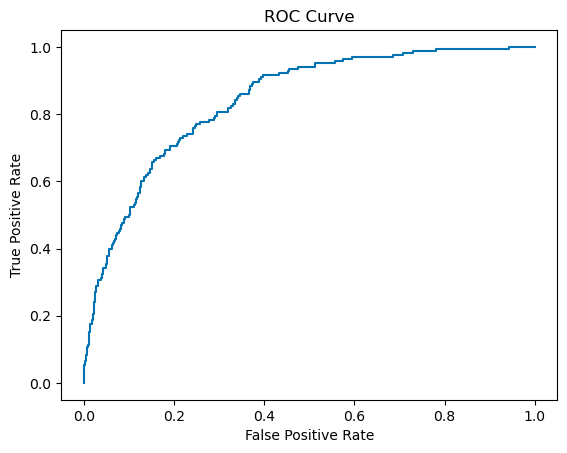

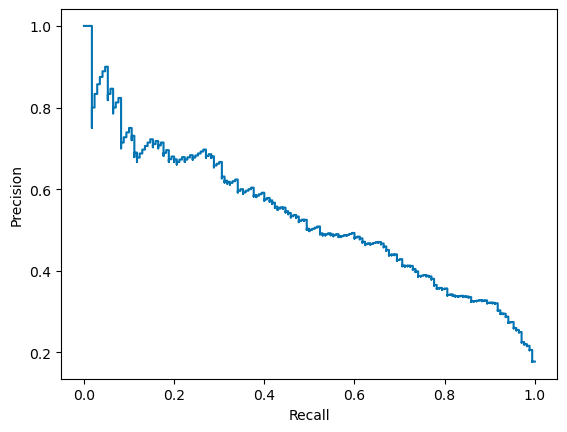

In [86]:
#ROC Curve display
y_score = clf.decision_function(X_test2)
fpr, tpr, _ = roc_curve(y_test2, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')

#precision recall display
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
prec, recall, _ = precision_recall_curve(y_test2, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()